In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from loguru import logger
sys.path.append(os.path.abspath('..'))
from env.env_gym import GuestEnv

In [2]:
def run_env(env, actions, steps=100, seed=42):
    obs, info = env.reset(seed=seed)
    phonemes, rewards = [], []
    for i in range(steps):
        act = actions[i] if i < len(actions) else actions[-1]
        obs, reward, terminated, truncated, info = env.step(act)
        phonemes.append(info['phoneme'].copy())
        rewards.append(reward)
        if terminated or truncated:
            break
    return np.array(phonemes), np.array(rewards)

def run_env_lowest_phoneme(env, action_kind, steps=100, seed=42):
    obs, info = env.reset(seed=seed)
    phonemes, rewards = [], []

    for i in range(steps):
        # Get current phoneme counts from env (or info)
        current_phonemes = getattr(env, "phonemes", info.get("phoneme"))
        
        if current_phonemes is None:
            raise ValueError("Environment or info must expose `phonemes` or `info['phoneme']`.")

        # Choose the participant with the lowest phoneme count
        target = int(np.argmin(current_phonemes))

        # Encourage that participant (action 5 + target)
        action = action_kind + target
        logger.info(f"{action=}, {current_phonemes=}, step={i}")

        obs, reward, terminated, truncated, info = env.step(action)

        # Track data
        phonemes.append(np.array(info["phoneme"], copy=True))
        rewards.append(reward)

        if terminated or truncated:
            break

    return np.array(phonemes), np.array(rewards)


def plot_results(phonemes, rewards, title):
    steps = np.arange(len(rewards))
    plt.figure(figsize=(9,4))
    for a in range(phonemes.shape[1]):
        plt.plot(steps, phonemes[:, a], label=f'Agent {a}')
    plt.xlabel('Step'); plt.ylabel('Phonemes'); plt.title(title + ' - Phonemes')
    plt.legend(); plt.grid(True); plt.show()
    plt.figure(figsize=(9,4))
    plt.plot(steps, rewards, label='Reward')
    plt.xlabel('Step'); plt.ylabel('Reward'); plt.title(title + ' - Reward')
    plt.grid(True); plt.show()

ACTIONS = {
    0: "wait",
    1: "stare_at 0",
    2: "stare_at 1",
    3: "stare_at 2",
    4: "encourage 0",
    5: "encourage 1",
    6: "encourage 2",
}

# Stare At

2025-10-20 23:34:12 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])


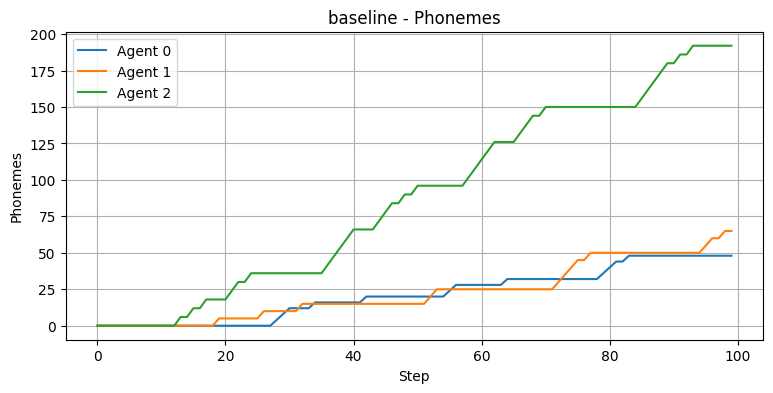

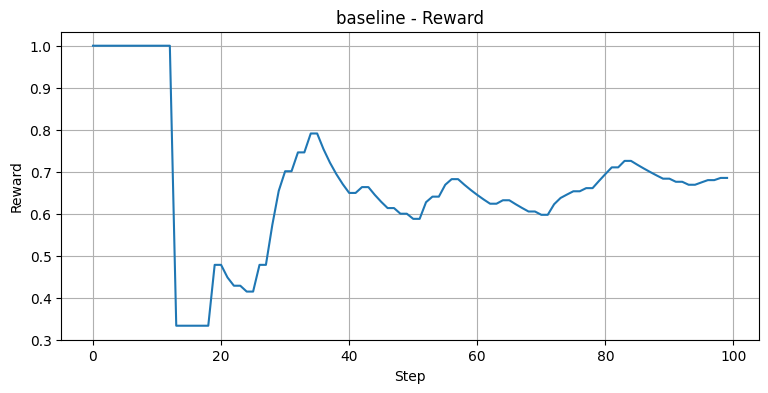

In [3]:
# Create environment
env_stare = GuestEnv(max_steps=500, reward_shaping=False)  # Shorter episodes for more frequent logging
actions = [1]*500
p, r = run_env(env_stare, actions)
plot_results(p, r, 'baseline')

2025-10-20 23:34:12 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])
2025-10-20 23:34:12 | INFO | action=1, current_phonemes=array([0, 0, 0]), step=0
2025-10-20 23:34:12 | INFO | action=1, current_phonemes=array([0, 0, 0]), step=1
2025-10-20 23:34:12 | INFO | action=1, current_phonemes=array([0, 0, 0]), step=2
2025-10-20 23:34:12 | INFO | action=1, current_phonemes=array([0, 0, 0]), step=3
2025-10-20 23:34:12 | INFO | action=1, current_phonemes=array([0, 0, 0]), step=4
2025-10-20 23:34:12 | INFO | action=1, current_phonemes=array([0, 0, 0]), step=5
2025-10-20 23:34:12 | INFO | action=1, current_phonemes=array([0, 0, 0]), step=6
2025-10-20 23:34:12 | INFO | action=1, current_phonemes=array([0, 0, 0]), step=7
2025-10-20 23:34:12 | INFO | action=1, current_phonemes=array([0, 0, 0]), step=8
2025-10-20 23:34:12 | INFO | action=1, current_phonemes=array([0, 0, 0]), step=9
2025-10-20 23:34:12 | INFO | action=1, current_phonemes=array([0, 0, 0]), step=10
2025-10-20 23:34:12 | I

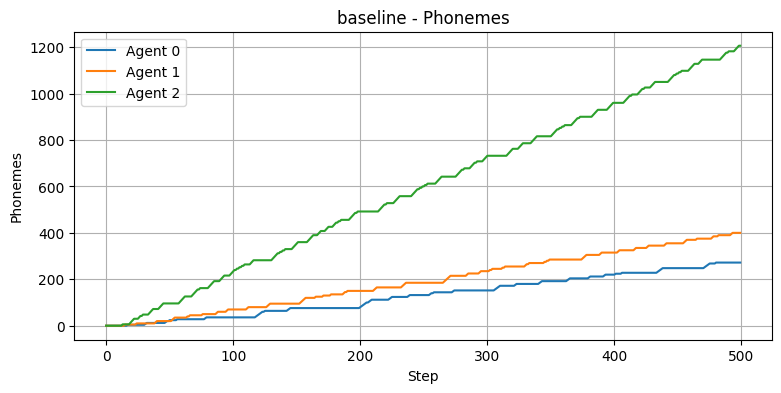

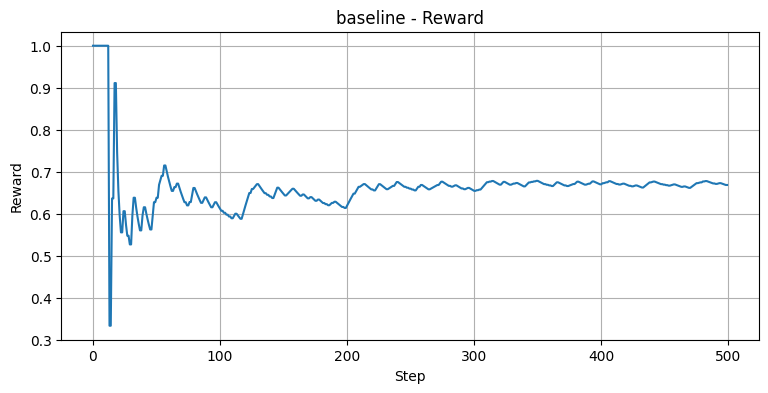

In [4]:
# Create environment
env_stare = GuestEnv(max_steps=500, reward_shaping=False)  # Shorter episodes for more frequent logging
p, r = run_env_lowest_phoneme(env_stare, 1,steps=500)
plot_results(p, r, 'baseline')

# Encourage

2025-10-20 23:34:12 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])


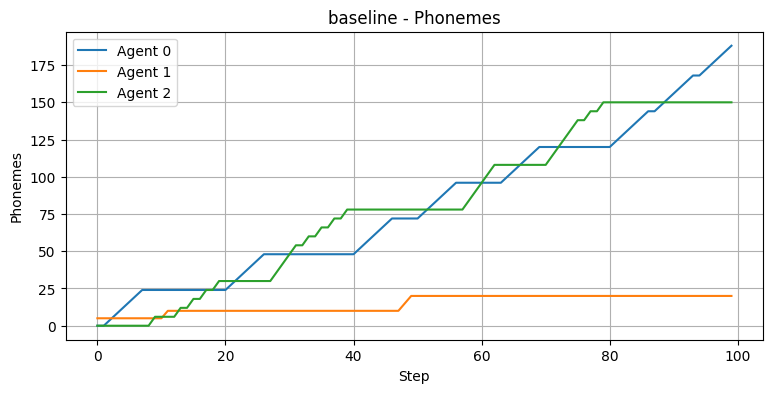

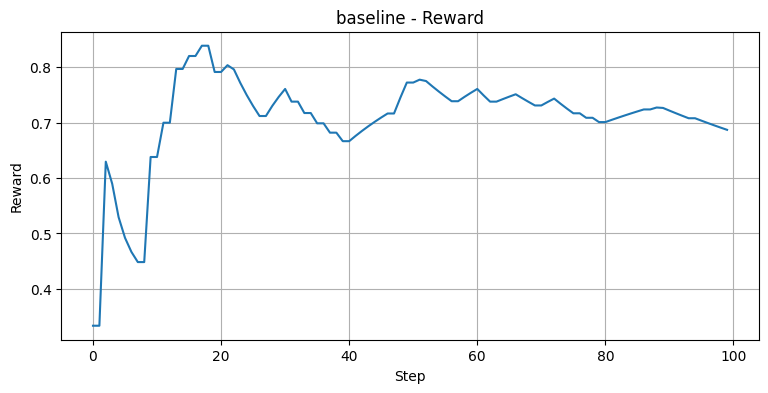

In [5]:
# Create environment
env_stare = GuestEnv(max_steps=500, reward_shaping=False)  # Shorter episodes for more frequent logging
actions = [4]*500
p, r = run_env(env_stare, actions)
plot_results(p, r, 'baseline')

2025-10-20 23:34:12 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])
2025-10-20 23:34:12 | INFO | action=4, current_phonemes=array([0, 0, 0]), step=0
2025-10-20 23:34:12 | INFO | action=4, current_phonemes=array([0, 0, 6]), step=1
2025-10-20 23:34:12 | INFO | action=4, current_phonemes=array([0, 0, 6]), step=2
2025-10-20 23:34:12 | INFO | action=4, current_phonemes=array([ 0,  0, 12]), step=3
2025-10-20 23:34:12 | INFO | action=4, current_phonemes=array([ 0,  0, 12]), step=4
2025-10-20 23:34:12 | INFO | action=5, current_phonemes=array([ 4,  0, 12]), step=5
2025-10-20 23:34:12 | INFO | action=5, current_phonemes=array([ 8,  0, 12]), step=6
2025-10-20 23:34:12 | INFO | action=5, current_phonemes=array([12,  0, 12]), step=7
2025-10-20 23:34:12 | INFO | action=5, current_phonemes=array([16,  0, 12]), step=8
2025-10-20 23:34:12 | INFO | action=5, current_phonemes=array([20,  0, 12]), step=9
2025-10-20 23:34:12 | INFO | action=5, current_phonemes=array([24,  0, 12]), step=10

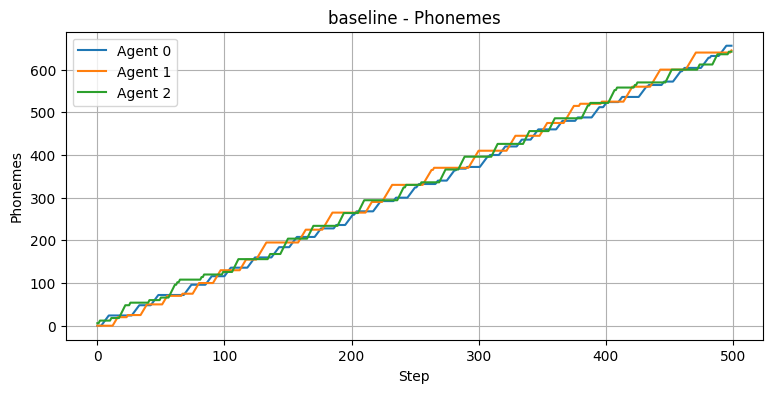

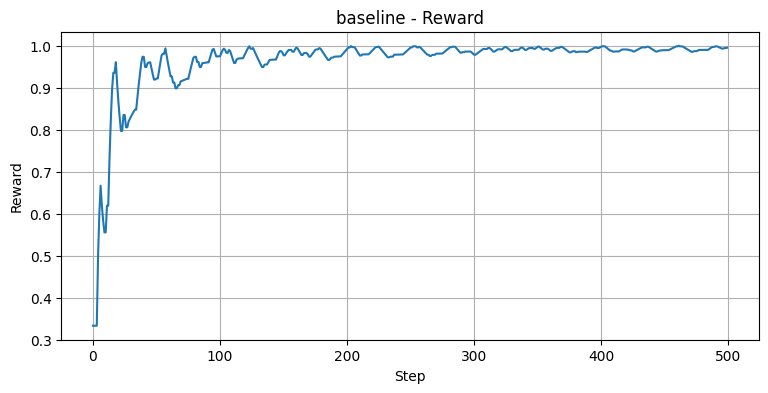

In [6]:
# Create environment
env_enc = GuestEnv(max_steps=500, reward_shaping=False)  # Shorter episodes for more frequent logging
p, r = run_env_lowest_phoneme(env_enc, 4,steps=500)
plot_results(p, r, 'baseline')

# Random

In [7]:
def get_action_rnd():
    actions = np.random.randint(0, 7, size=500)  # 100 random integers 0–6
    return actions

In [8]:
action_arr = [] 
for i in range(5):
    arr = get_action_rnd()
    action_arr.append(arr)
    print(action_arr)

[array([2, 0, 4, 5, 3, 3, 4, 2, 5, 6, 1, 4, 5, 1, 3, 5, 2, 2, 1, 6, 6, 5,
       4, 2, 3, 0, 1, 5, 0, 4, 6, 3, 3, 2, 4, 4, 2, 5, 1, 6, 2, 4, 3, 0,
       1, 6, 4, 0, 5, 0, 6, 6, 2, 6, 3, 5, 5, 4, 1, 5, 4, 4, 5, 2, 5, 4,
       1, 6, 3, 4, 3, 5, 1, 1, 3, 3, 5, 6, 5, 1, 6, 1, 2, 3, 2, 4, 6, 5,
       1, 3, 5, 6, 0, 1, 3, 6, 2, 6, 4, 0, 6, 2, 2, 3, 1, 5, 4, 1, 6, 6,
       4, 5, 4, 2, 5, 0, 2, 4, 3, 4, 5, 4, 4, 4, 5, 3, 0, 2, 2, 1, 0, 0,
       2, 1, 6, 4, 1, 3, 3, 2, 6, 4, 5, 6, 1, 1, 1, 2, 2, 4, 1, 3, 1, 0,
       3, 5, 5, 0, 6, 0, 6, 6, 2, 6, 6, 3, 5, 6, 4, 6, 5, 6, 5, 3, 2, 1,
       6, 0, 1, 5, 2, 6, 0, 4, 6, 5, 3, 0, 2, 3, 5, 6, 2, 1, 4, 3, 5, 5,
       5, 4, 5, 5, 0, 5, 0, 0, 1, 1, 4, 4, 3, 6, 3, 4, 4, 4, 3, 1, 2, 5,
       4, 6, 1, 4, 6, 3, 1, 1, 4, 6, 1, 2, 5, 5, 1, 4, 0, 6, 4, 2, 5, 0,
       0, 2, 6, 6, 3, 1, 5, 3, 6, 5, 2, 5, 1, 1, 0, 0, 4, 5, 4, 5, 2, 5,
       3, 1, 6, 2, 3, 5, 6, 5, 3, 6, 0, 1, 6, 5, 6, 5, 2, 5, 0, 5, 6, 6,
       3, 4, 6, 4, 3, 2, 2, 5, 1, 1, 4, 0, 3, 4, 2

2025-10-20 23:34:13 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])


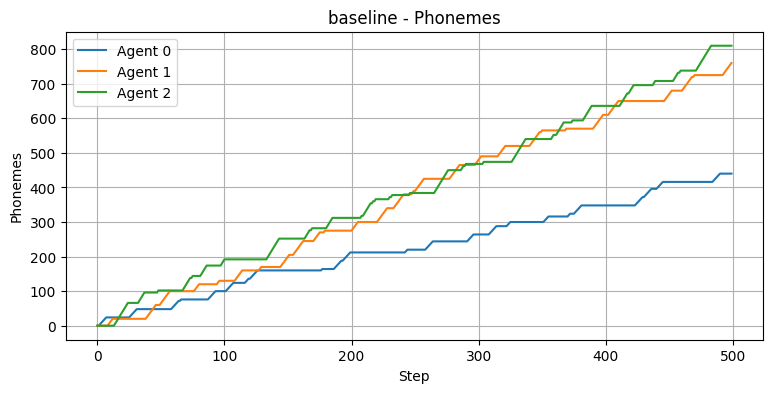

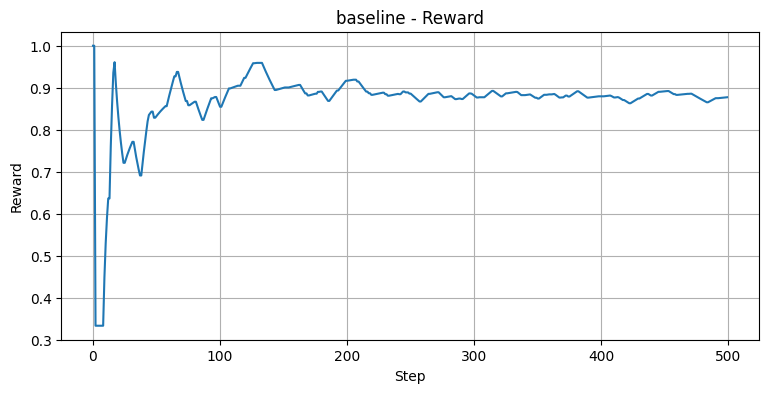

In [ ]:
# Create environment
env_rand = GuestEnv(max_steps=500, reward_shaping=False)  # Shorter episodes for more frequent logging
p, r = run_env(env_rand, action_arr[0],steps=500)
plot_results(p, r, 'baseline')


2025-10-20 23:34:13 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])


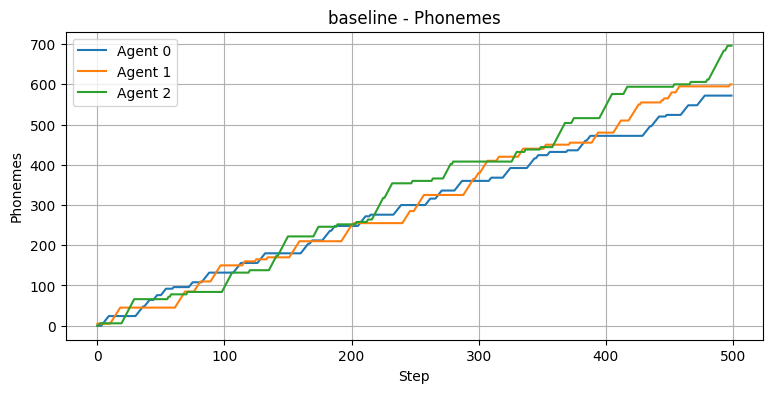

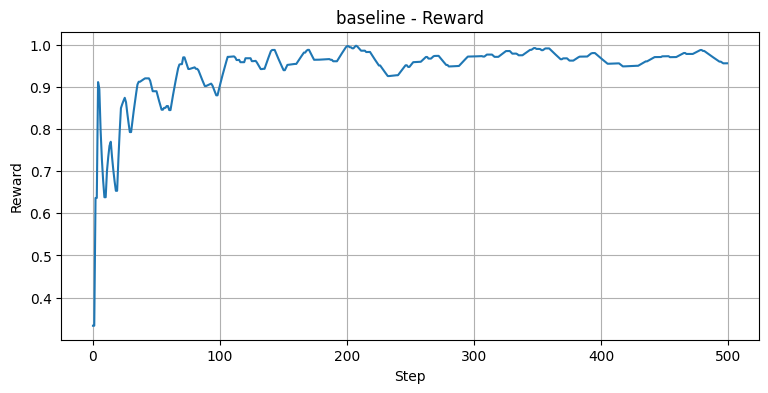

In [10]:
# Create environment
env_rand = GuestEnv(max_steps=500, reward_shaping=False)  # Shorter episodes for more frequent logging
p, r = run_env(env_rand, action_arr[1],steps=500)
plot_results(p, r, 'baseline')

2025-10-20 23:34:13 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])


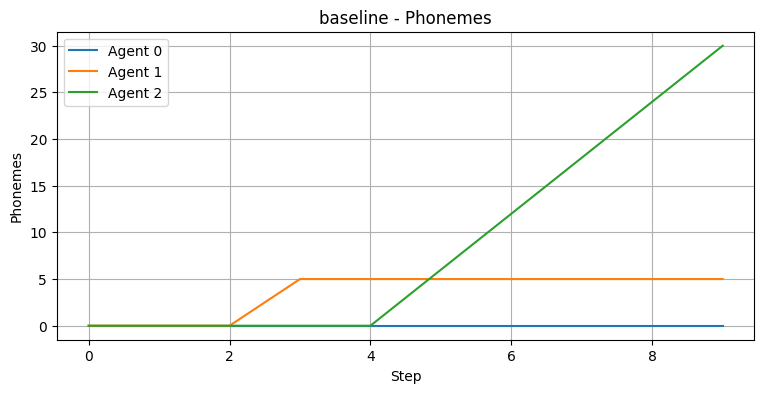

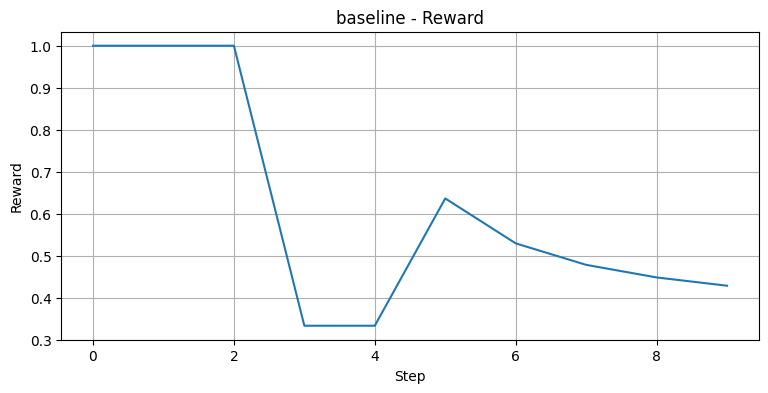

In [11]:
# Create environment
env_rand = GuestEnv(max_steps=10, reward_shaping=False)  # Shorter episodes for more frequent logging
p, r = run_env(env_rand, action_arr[2],steps=500)
plot_results(p, r, 'baseline')

2025-10-20 23:34:14 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])


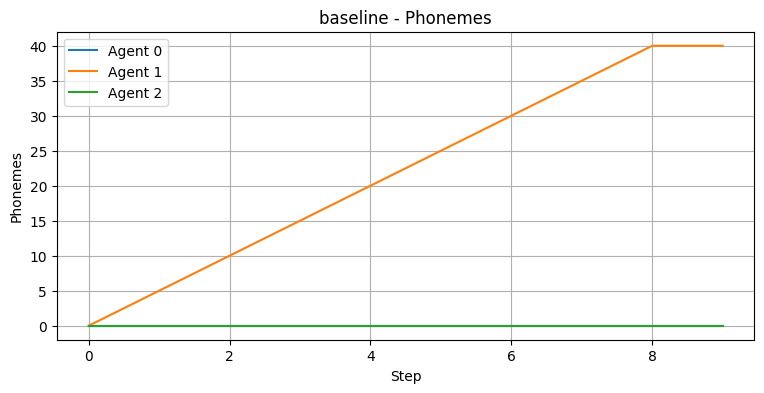

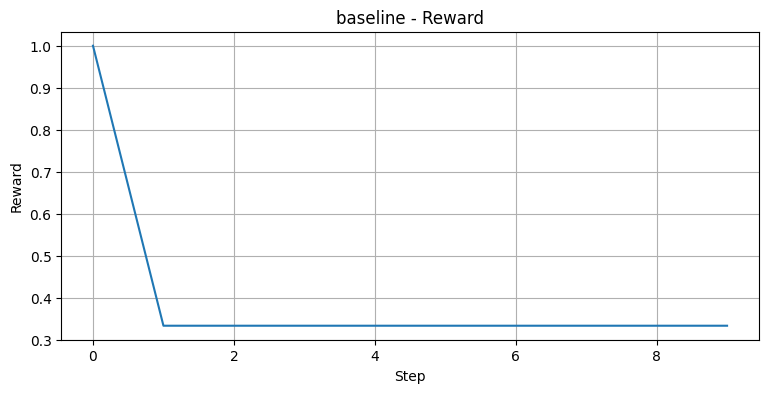

In [12]:
# Create environment
env_rand = GuestEnv(max_steps=10, reward_shaping=False)  # Shorter episodes for more frequent logging
p, r = run_env(env_rand, action_arr[3],steps=500)
plot_results(p, r, 'baseline')

2025-10-20 23:34:14 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])


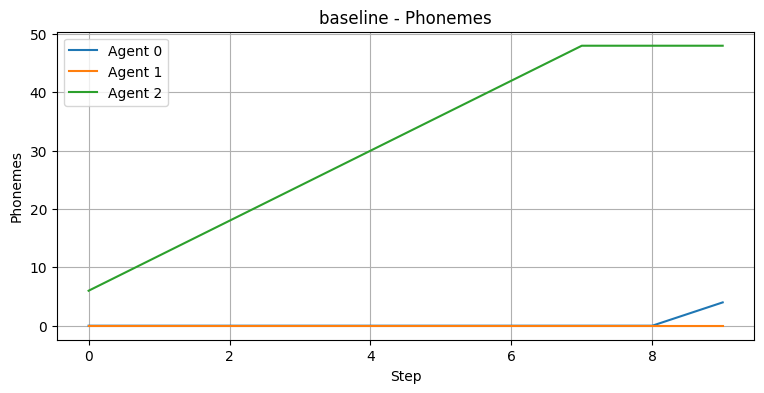

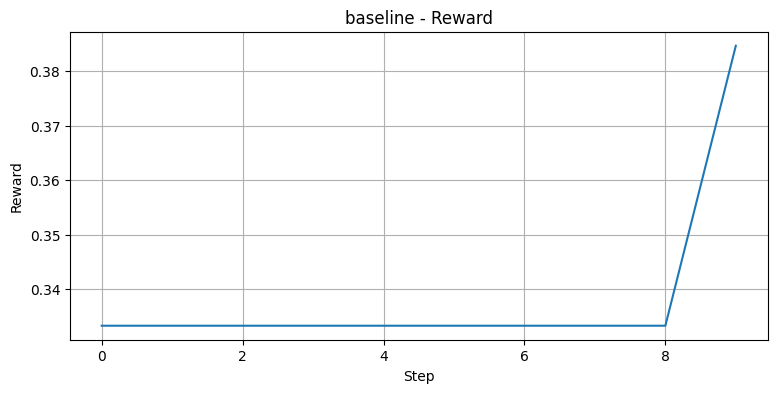

In [13]:
# Create environment
env_rand = GuestEnv(max_steps=10, reward_shaping=False)  # Shorter episodes for more frequent logging
p, r = run_env(env_rand, action_arr[4],steps=500)
plot_results(p, r, 'baseline')